# coverage heatmap of various capture-seq kits

Author: Thomas Cokelaer 2021-2022

Scripts from Sequana https://sequana.readthedocs.io

Data from https://github.com/sequana/mapper pipeline 

In [2]:
from sequana import *
import pandas as pd
import pathlib
import glob
from pylab import *
from sequana.viz.heatmap import Clustermap, get_clustermap_data


In [3]:
PATH='coverage'

In [4]:

samples2= {
        "4520": "A1",
        "4885": "A2",
        "4716": "A3",
        "4660": "A4",
        "4653": "B1",
        "4676": "B2",
        "4707": "B3",
        "4697": "B4",
        "4787": "C1",
        "4861": "C2",
        "4673": "C3",
        "4688": "C4",
        "4777": "D1",
        "4489": "D2",
    #    "4510": "D",
        "4668": "D3",
        "4544": "E1",
        "4798": "E2",
        "4797": "E3",
        "4656": "E4"
    }



In [5]:

samples= {
        "4520": "A",
        "4885": "A",
        "4716": "A",
        "4660": "A",
        "4653": "B",
        "4676": "B",
        "4707": "B",
        "4697": "B",
        "4787": "C",
        "4861": "C",
        "4673": "C",
        "4688": "C",
        "4777": "D",
        "4489": "D",
    #    "4510": "D",
        "4668": "D",
        "4544": "E",
        "4798": "E",
        "4797": "E",
        "4656": "E"
    }


In [6]:

category =  {"4520": 1,
        "4885": 1,
        "4716": 1,
        "4660": 1,
        "4653": 2,
        "4676": 2,
        "4707": 2,
        "4697": 2,
        "4787": 3,
        "4861": 3,
        "4673": 3,
        "4688": 3,
        "4777": 4,
        "4489": 4,
    #    "4510": 4,
        "4668": 4,
        "4544": 5,
        "4798": 5,
        "4797": 5,
        "4656": 5}



## Reading Twist cov MiSeq coverage results

In [7]:
filenames = glob.glob(PATH + "/twist_cov_ms/*/bam2cov/*bed")
results = {}
for filename in filenames:
    p = pathlib.Path(filename)
    df = pd.read_csv(filename, sep="\t", header=None)
    name = p.name.replace("_L001.bed","").split("_")[0]
    results[name] = df
df = pd.DataFrame(dict([(x, results[x][2]) for x in results.keys()]))
del df['4510']
df_twist = df.copy()


## Reading arbo double capture coverage results

In [8]:

filenames = glob.glob(PATH + "/arbo_double_ms/*/bam2cov/*bed")
results = {}
for filename in filenames:
    p = pathlib.Path(filename)
    df = pd.read_csv(filename, sep="\t", header=None)
    name = p.name.replace("_L001.bed","").split("_")[0]
    results[name] = df
df = pd.DataFrame(dict([(x, results[x][2]) for x in results.keys()]))
df_arbo = df.copy()



## Reading illumina respiratory coverage results

In [11]:
filenames = glob.glob(PATH +"/illumina_resv_ms/*/bam2cov/*bed")
results = {}
for filename in filenames:
    p = pathlib.Path(filename)
    df = pd.read_csv(filename, sep="\t", header=None)
    name = p.name.replace("_L001.bed","").split("_")[0]
    results[name] = df
df = pd.DataFrame(dict([(x, results[x][2]) for x in results.keys()]))
df_ill = df.copy()



# correlation all samples for Twist cov only

Text(-6, -0.2, 'All groups twist cov kit')

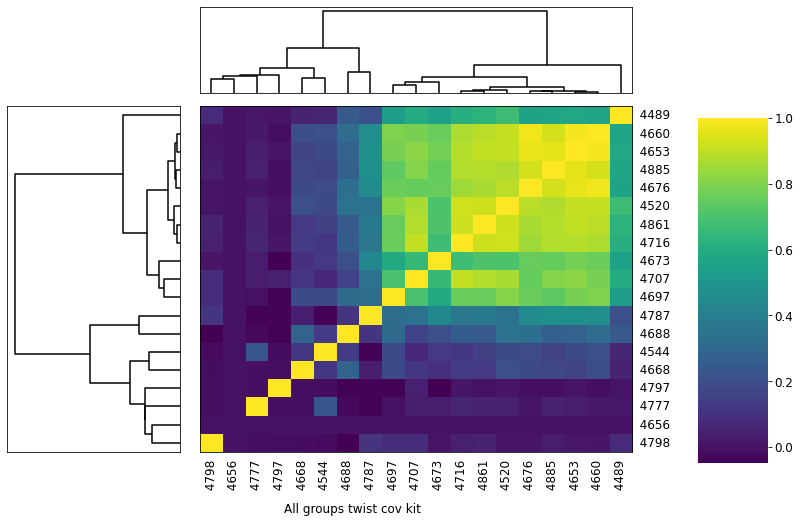

In [12]:

# valid for all
sample_groups_df = pd.DataFrame({'sample': df.columns, 'group': [samples[x] for x in df.columns]})
sample_groups_df.set_index("sample", inplace=True)

viz.Heatmap(df_twist.corr().fillna(0)).plot(cmap='viridis')
text(-6, -0.2, 'All groups twist cov kit')


# correlation all samples for illumina  only

Text(-6, -0.2, 'All groups illumina cov kit')

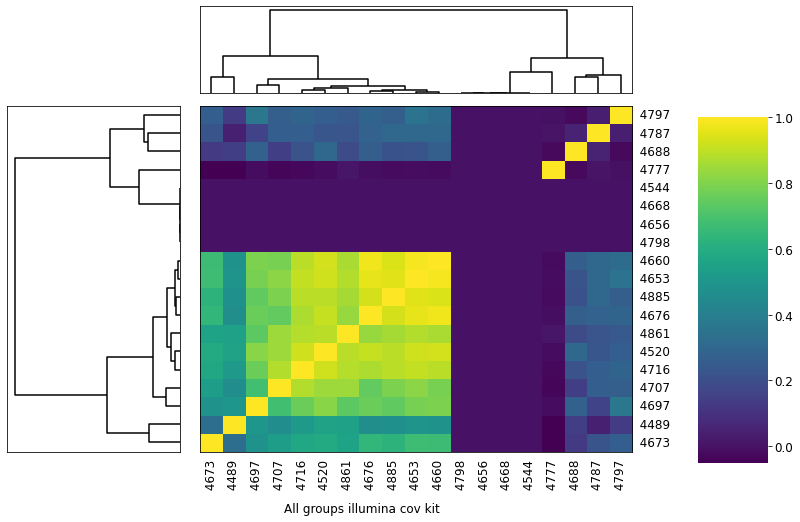

In [13]:

viz.Heatmap(df_ill.corr().fillna(0)).plot(cmap='viridis')
text(-6, -0.2, 'All groups illumina cov kit')


# correlation all samples for Arbo  only

Text(-6, -0.2, 'All groups arbo cov kit')

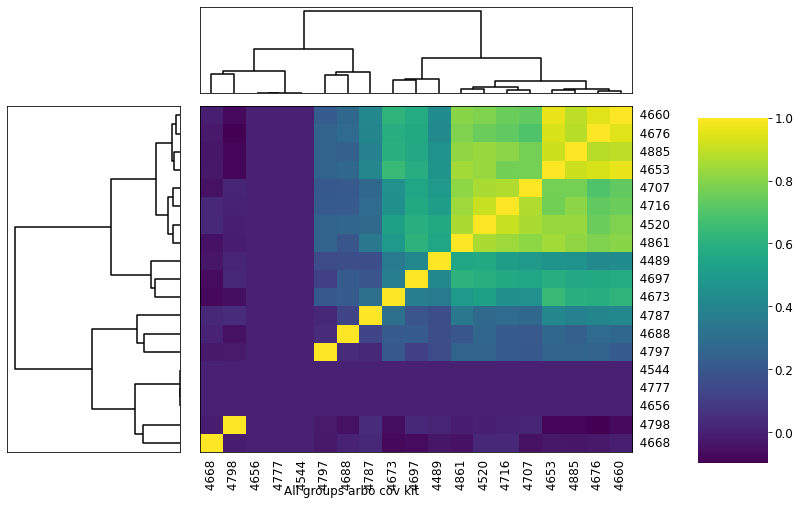

In [14]:
h = viz.Heatmap(df_arbo.corr().fillna(0))
viz.Heatmap(df_arbo.corr().fillna(0)).plot(cmap='viridis')
text(-6, -0.2, 'All groups arbo cov kit')


# Study of correlation between kits for a given group

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


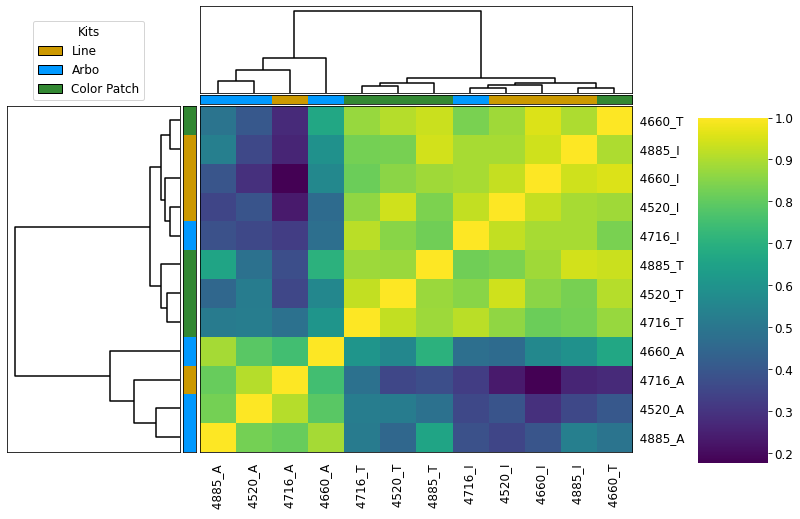

In [15]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

for group in 'ABCDEA':
    A = [k for k in df_twist.columns if samples[k][0]==group]
    df = pd.concat([df_twist[A], df_ill[A], df_arbo[A]], axis=1)
    df.columns = [x+'_T' for x in A] +  [x+'_I' for x in A] + [x+'_A' for x in A]  
    h = viz.Heatmap(df.corr().fillna(0))
    for x in df.columns:
        if x[-1] == 'T':
            h.category_column[x] = 1
            h.category_row[x] = 1
        elif x[-1] == 'I':
            h.category_column[x] = 2
            h.category_row[x] = 2
        elif x[-1] == 'A':
            h.category_column[x] = 3
            h.category_row[x] = 3
            
    h.params.col_side_colors = ["#cc9900", "#0099ff", "#338833"]
    h.params.row_side_colors = ["#cc9900", "#0099ff", "#338833"]

    h.plot(cmap='viridis')
    #text(-6,-0., f'Groupe {group} only in illumina (i), arbo (a) and twist (t) kits')
    legend_elements = [Patch(facecolor='#cc9900', label='Line', edgecolor="k"),
                       Patch(facecolor='#0099ff', label='Arbo', edgecolor="k"),
                        Patch(facecolor='#338833', edgecolor='k', label='Color Patch')]
    ax = gcf().get_axes()[3]
    ax.legend(handles=legend_elements, title="Kits", loc="center left", bbox_to_anchor=(-0.4, 5))
    savefig(f'correlation_group_{group}_interkit_bis.png', dpi=200)
    savefig(f'correlation_group_{group}_interkit_bis.eps', dpi=200)
    savefig(f'correlation_group_{group}_interkit_bis.pdf', dpi=200)
